# Machine Learning Exercise 3-1
## Question 1 : Visualizing SVM Kernels
By Gholamreza Dar

https://gholamrezadar.ir/

Jan 2022


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML_HW03.pdf)

## Load data

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style("darkgrid")

In [183]:
# Loading the iris dataset
iris = datasets.load_iris()

# Seperate by sepal and petal features(so we have two 2D problems)
X_sepal = iris.data[:, :2]
X_petal = iris.data[:, 2:]
y = iris.target

# Train test split with test_size=0.3
X_sepal_train,X_sepal_test,y_sepal_train,y_sepal_test = train_test_split(X_sepal, y, test_size=0.3)
X_petal_train,X_petal_test,y_petal_train,y_petal_test = train_test_split(X_petal, y, test_size=0.3)

# Standardize the data
scaler=StandardScaler()
X_sepal_train = scaler.fit_transform(X_sepal_train)
X_sepal_test = scaler.fit_transform(X_sepal_test)
X_petal_train = scaler.fit_transform(X_petal_train)
X_petal_test = scaler.fit_transform(X_petal_test)

# for plotting
class_names = ["setosa", "versicolor", "virginica"]

sepal_data = pd.DataFrame({"sepal_width":X_sepal_train[:,0], "sepal_length":X_sepal_train[:,1], "class":y_sepal_train})
sepal_data["class"] = sepal_data["class"].map(lambda x:class_names[x])

petal_data = pd.DataFrame({"petal_width":X_petal_train[:,0], "petal_length":X_petal_train[:,1], "class":y_petal_train})
petal_data["class"] = petal_data["class"].map(lambda x:class_names[x])


## Helper Functions

### plot linear

In [295]:
def decision_boundary_linear(resolution):
  fig, axs = plt.subplots(2, 5, figsize=(35,8), constrained_layout=True ,dpi=72)
  fig.suptitle("Linear Kernel")
  C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
  # Custom Colors
  colors = ('crimson', 'deepskyblue', 'mediumspringgreen')

  # Sepal row 
  X = X_sepal_train
  y = y_sepal_train
  X_test = X_sepal_test
  y_test = y_sepal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[0, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_sepal=SVC(kernel="linear", C=c)
    model_sepal.fit(X, y)
    z=model_sepal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_sepal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_sepal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X_test[y_test==cl,0], X_test[y_test==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  # Petal row 
  X = X_petal_train
  y = y_petal_train
  X_test = X_petal_test
  y_test = y_petal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[1, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_petal=SVC(kernel="linear", C=c)
    model_petal.fit(X, y)
    z=model_petal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_petal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_petal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Petal length")
    ax.set_ylabel("Petal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  plt.show()

### plot poly

In [305]:
def decision_boundary_polynomial(degree, resolution):
  fig, axs = plt.subplots(2, 3, figsize=(35,8), constrained_layout=True ,dpi=72)
  fig.suptitle(f"Polynomial Kernel with degree = {degree}")
  C_values = [0.01, 1.0, 100.0]
  # Custom Colors
  colors = ('crimson', 'deepskyblue', 'mediumspringgreen')

  # Sepal row 
  X = X_sepal_train
  y = y_sepal_train
  X_test = X_sepal_test
  y_test = y_sepal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[0, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_sepal=SVC(kernel="poly", C=c, degree=degree)
    model_sepal.fit(X, y)
    z=model_sepal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_sepal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_sepal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  # Petal row 
  X = X_petal_train
  y = y_petal_train
  X_test = X_petal_test
  y_test = y_petal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[1, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_petal=SVC(kernel="poly", C=c, degree=degree)
    model_petal.fit(X, y)
    z=model_petal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_petal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_petal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Petal length")
    ax.set_ylabel("Petal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  plt.show()

### plot rbf

In [304]:
def decision_boundary_rbf(gamma, resolution):
  fig, axs = plt.subplots(2, 3, figsize=(35,8), constrained_layout=True ,dpi=72)
  fig.suptitle(f"RBF Kernel with gamma={gamma}")
  C_values = [0.01, 1.0, 100.0]
  # Custom Colors
  colors = ('crimson', 'deepskyblue', 'mediumspringgreen')

  # Sepal row 
  X = X_sepal_train
  y = y_sepal_train
  X_test = X_sepal_test
  y_test = y_sepal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[0, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_sepal=SVC(kernel="rbf", C=c, gamma=gamma)
    model_sepal.fit(X, y)
    z=model_sepal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_sepal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_sepal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  # Petal row 
  X = X_petal_train
  y = y_petal_train
  X_test = X_petal_test
  y_test = y_petal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[1, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_petal=SVC(kernel="rbf", C=c, gamma=gamma)
    model_petal.fit(X, y)
    z=model_petal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_petal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_petal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Petal length")
    ax.set_ylabel("Petal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  plt.show()

### plot sigmoid

In [303]:
def decision_boundary_sigmoid(gamma, resolution):
  fig, axs = plt.subplots(2, 3, figsize=(35,8), constrained_layout=True ,dpi=72)
  fig.suptitle(f"sigmoid Kernel with gamma={gamma}")
  C_values = [0.01, 1.0, 100.0]
  # Custom Colors
  colors = ('crimson', 'deepskyblue', 'mediumspringgreen')

  # Sepal row 
  X = X_sepal_train
  y = y_sepal_train
  X_test = X_sepal_test
  y_test = y_sepal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[0, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_sepal=SVC(kernel="sigmoid", C=c, gamma=gamma)
    model_sepal.fit(X, y)
    z=model_sepal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_sepal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_sepal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  # Petal row 
  X = X_petal_train
  y = y_petal_train
  X_test = X_petal_test
  y_test = y_petal_test

  colormap=ListedColormap(colors[:len(np.unique(y))])
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

  # Plot for every C
  for i, c in enumerate(C_values):
    ax = axs[1, i]
    
    # Train the classifier and find acc, f1
    xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
    model_petal=SVC(kernel="sigmoid", C=c, gamma=gamma)
    model_petal.fit(X, y)
    z=model_petal.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)

    # calculate accuracy
    acc = model_petal.score(X_test, y_test)

    # calculate f1-score
    y_pred = model_petal.predict(X_test)
    f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    
    # Plot the decision boundary
    ax.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

    # PLot the points
    for idx,cl in enumerate(np.unique(y)):
      ax.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
    
    # Matplotlib stuff
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Petal length")
    ax.set_ylabel("Petal width")
    ax.set_title(f"C={c}, acc={acc:.2}, f1={f1:.2}")
    
    ax.legend(class_names,loc='upper left')

  plt.show()

### decision boundary

In [203]:
from matplotlib.colors import ListedColormap

def decision_boundary(X,y,model,resolution, x_label, y_label):
  # Custom Colors
  colors = ('crimson', 'deepskyblue', 'mediumspringgreen')
  colormap=ListedColormap(colors[:len(np.unique(y))])

  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min, x_max, resolution),np.arange(y_min, y_max, resolution))
  z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  zz=z.reshape(xx.shape)

  # Plot the decision boundary
  plt.pcolormesh(xx,yy,zz,cmap=colormap, antialiased=True, shading='gouraud' )

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(X[y==cl,0], X[y==cl,1],c=colors[idx], cmap=plt.cm.Paired, edgecolors='k',marker='o', label=cl, alpha=0.8, s=100)
  plt.legend(class_names,loc='upper left')

## a) Plot the data

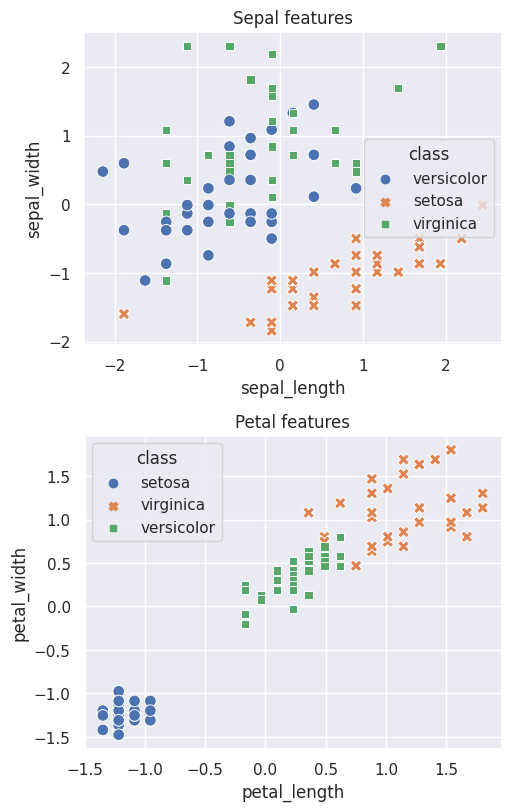

In [187]:
fig, axs = plt.subplots(2,1, constrained_layout=True, figsize=(5,8), dpi=100)

# Plotting the sepal features
axs[0].set_title("Sepal features")
sns.scatterplot(data=sepal_data, x="sepal_length", y="sepal_width", hue="class", style="class", palette="deep", s=70, ax=axs[0])

# Plotting the petal features
axs[1].set_title("Petal features")
sns.scatterplot(data=petal_data, x="petal_length", y="petal_width", hue="class", style="class", palette="deep", s=70, ax=axs[1])

plt.show()

## b) Classify and plot the decision boundary using SVM

### Linear Kernel

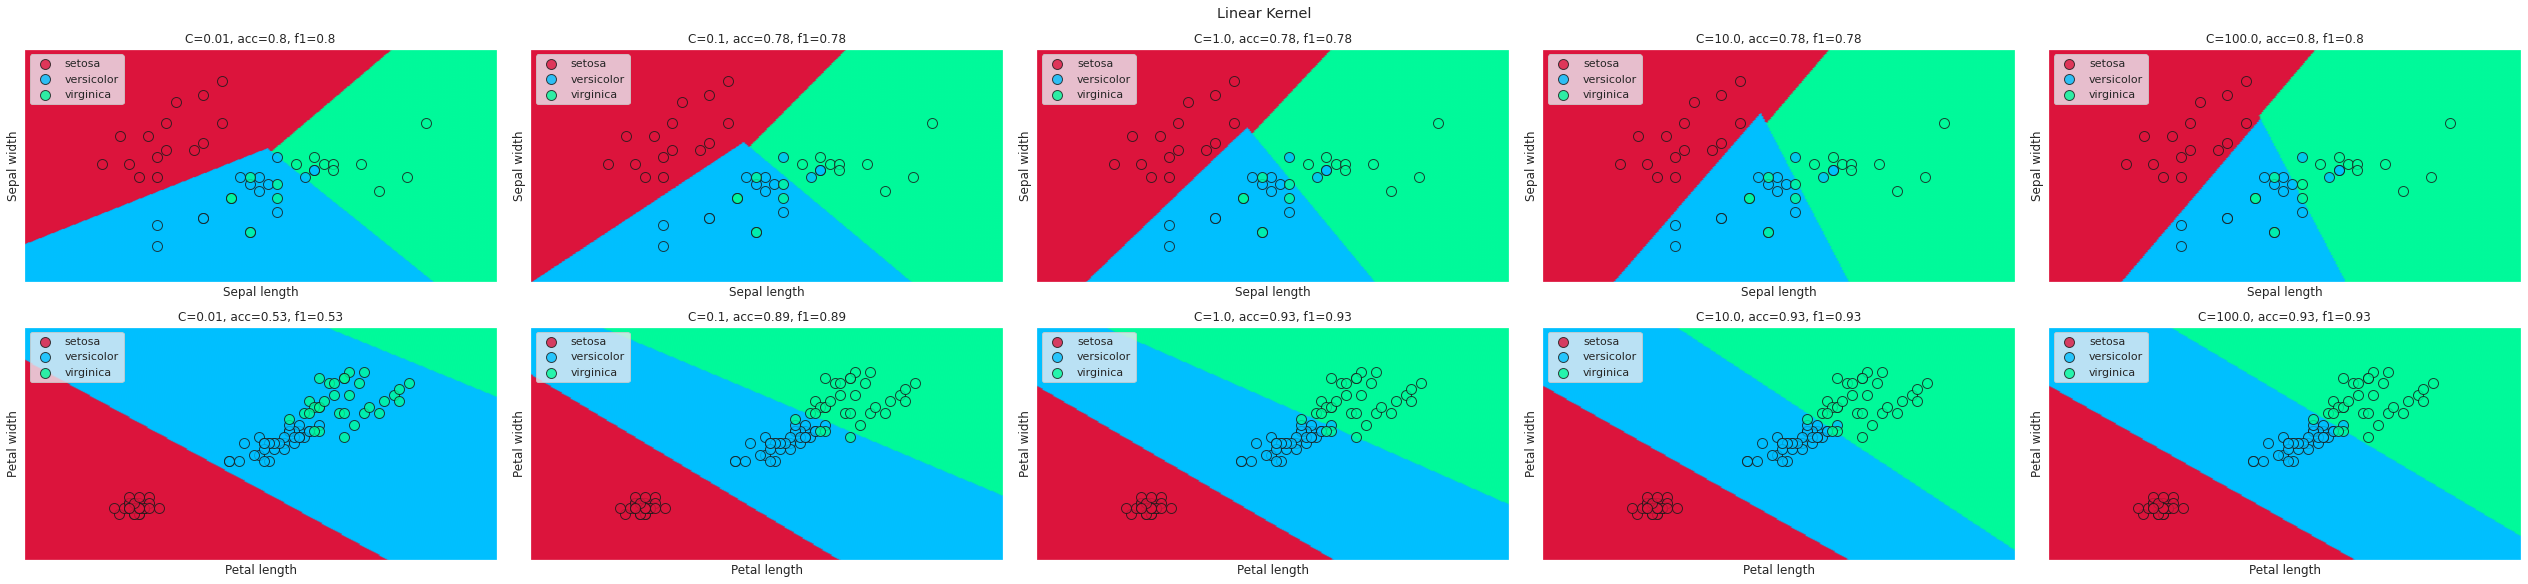

In [299]:
decision_boundary_linear(resolution=0.02)

### Polynomial Kernel

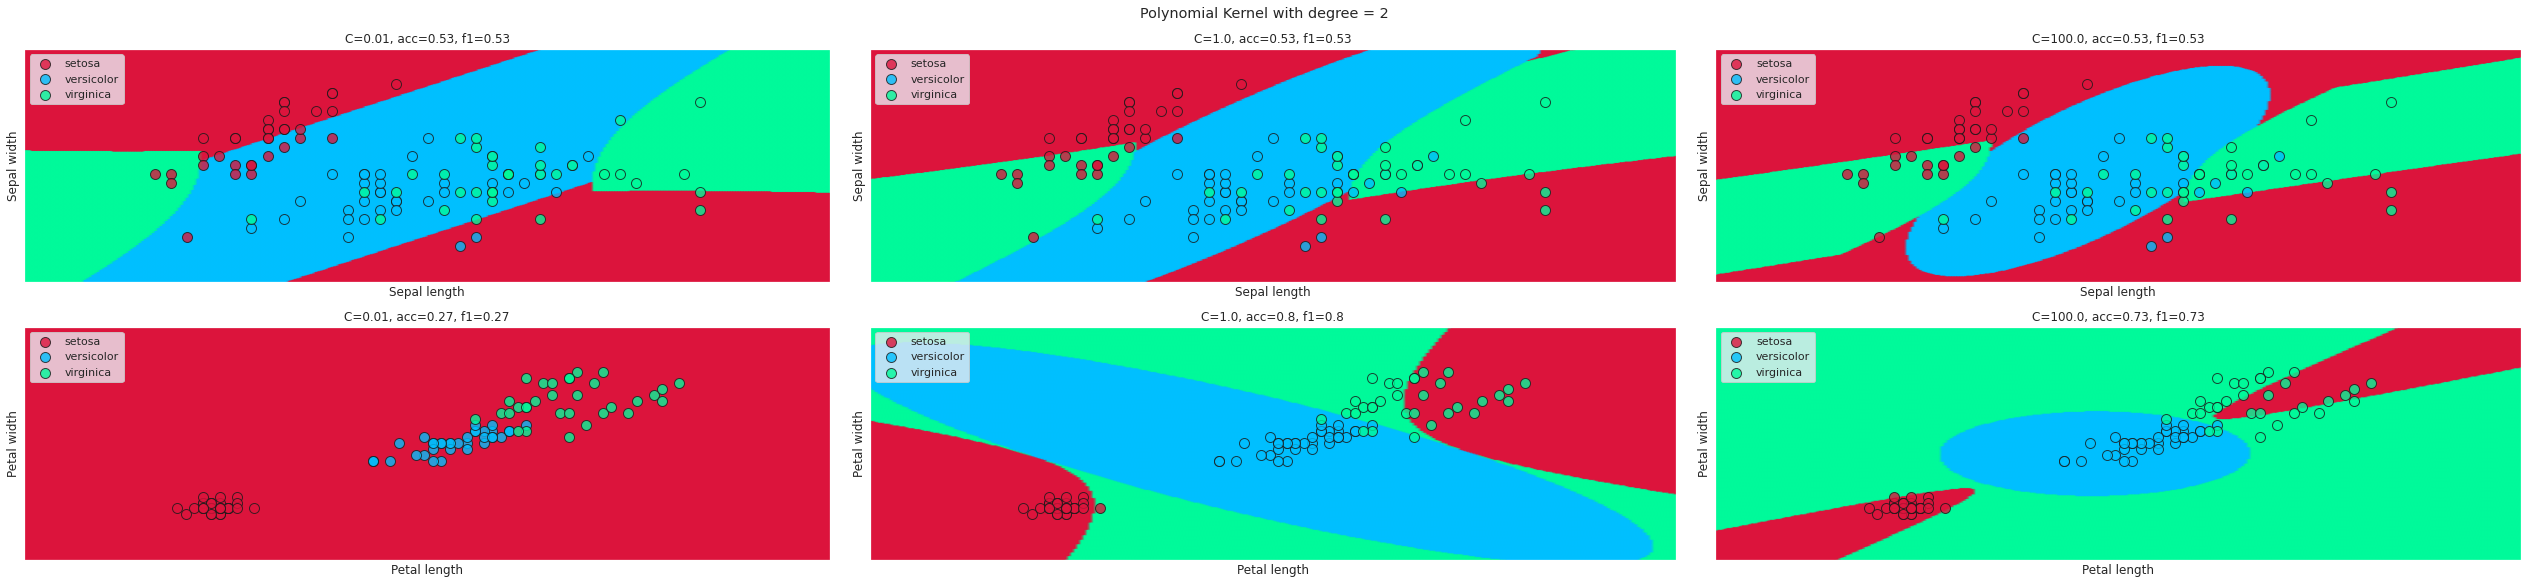

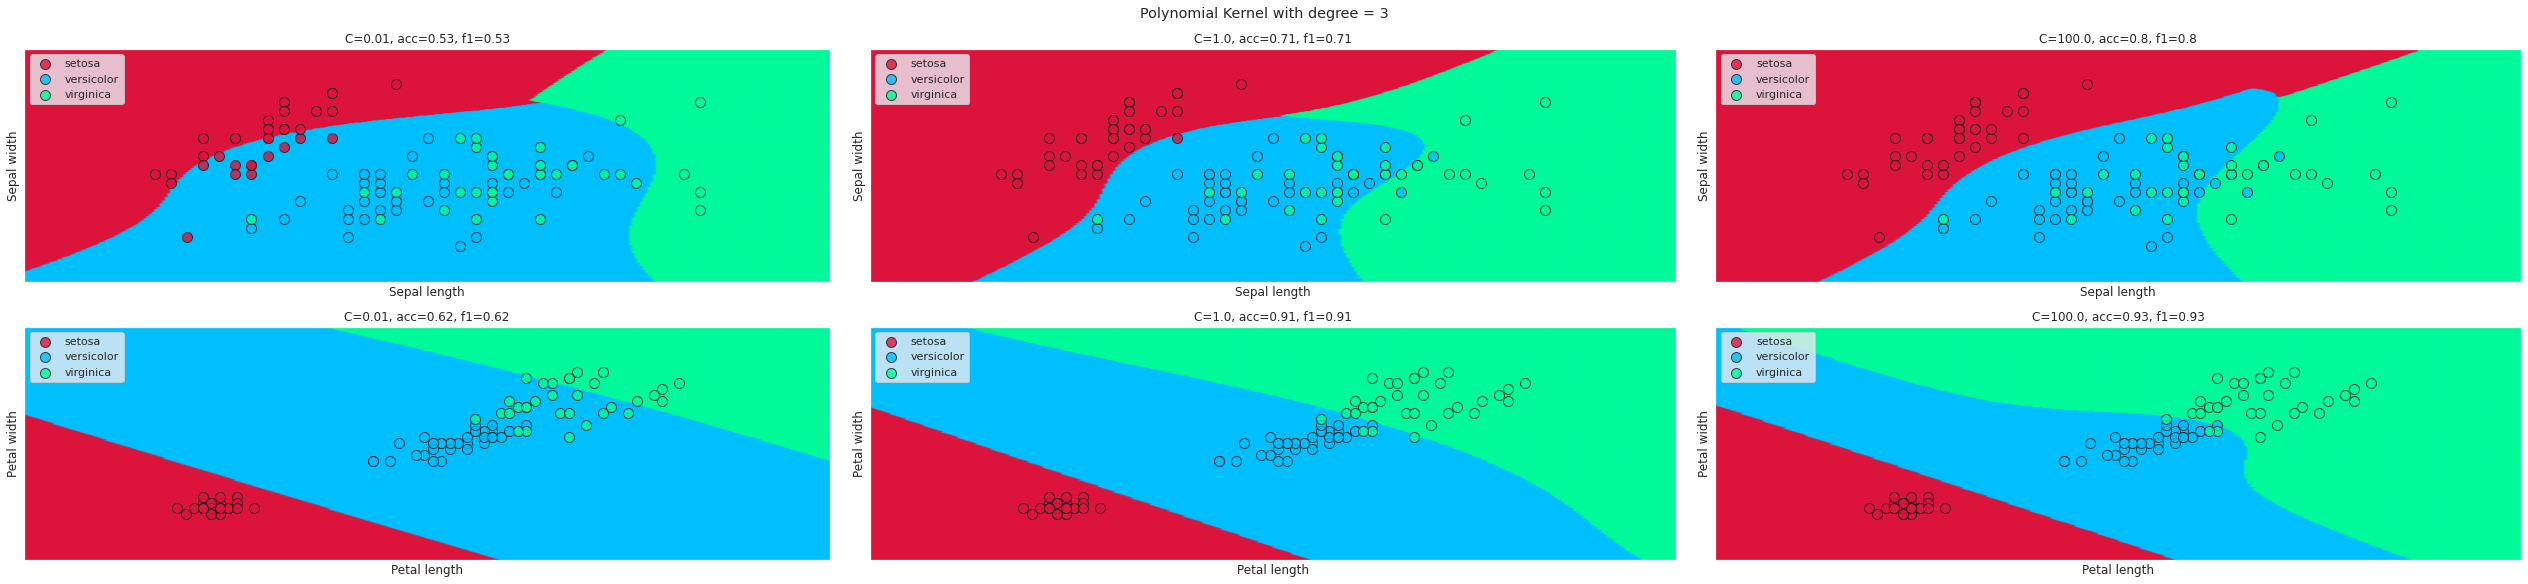

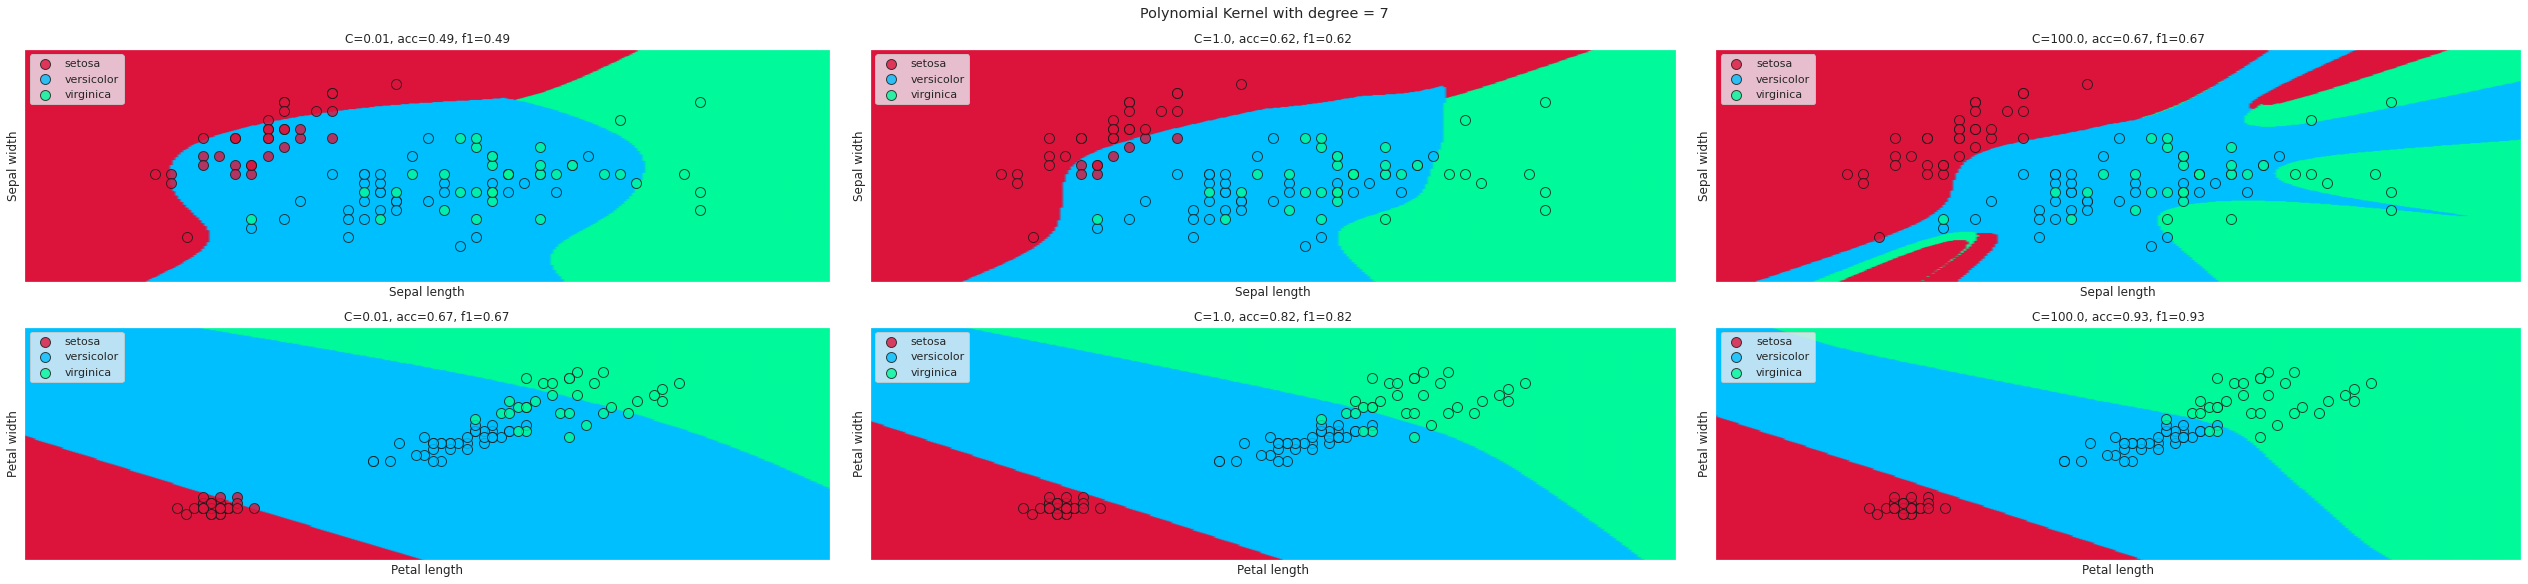

In [306]:
decision_boundary_polynomial(degree=2, resolution=0.02);print()
decision_boundary_polynomial(degree=3, resolution=0.02);print()
decision_boundary_polynomial(degree=7, resolution=0.02)

### RBF Kernel

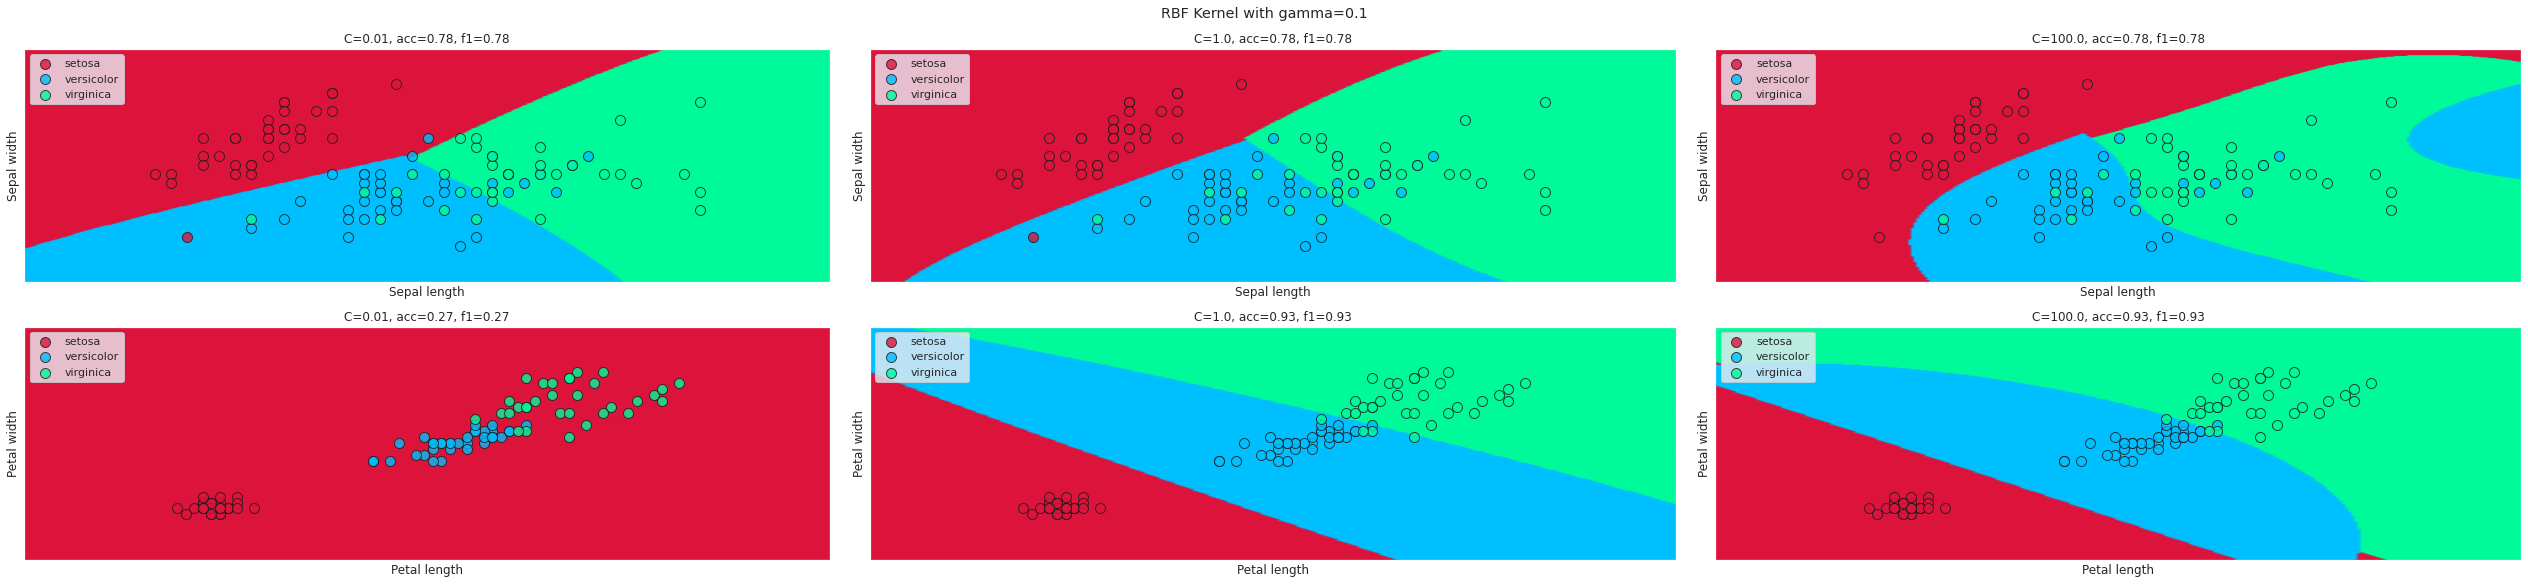

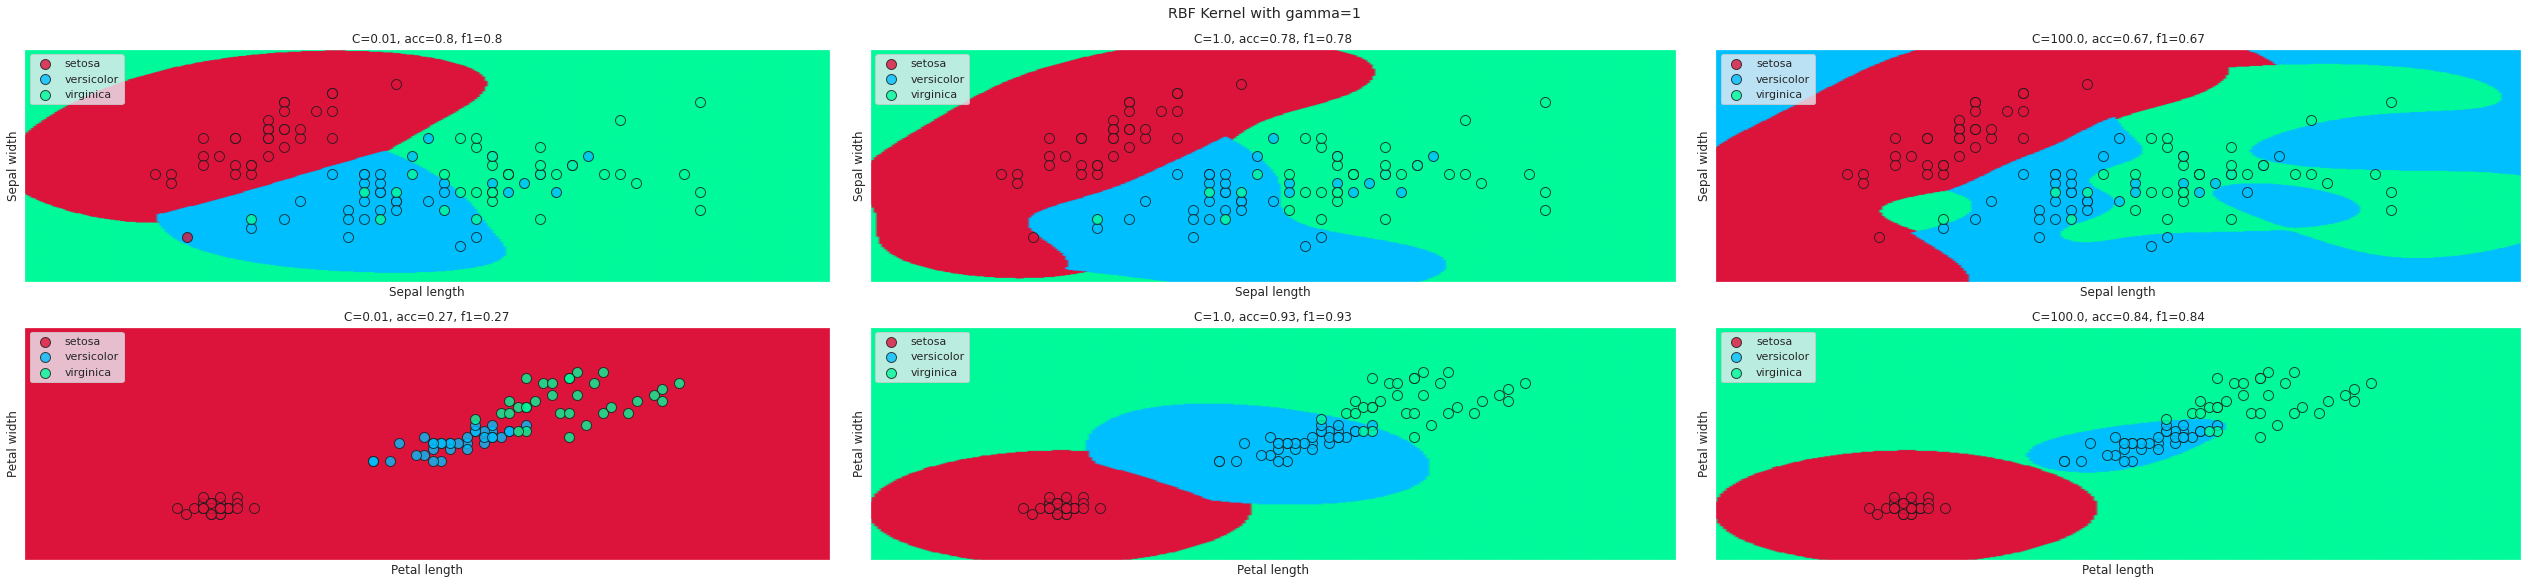

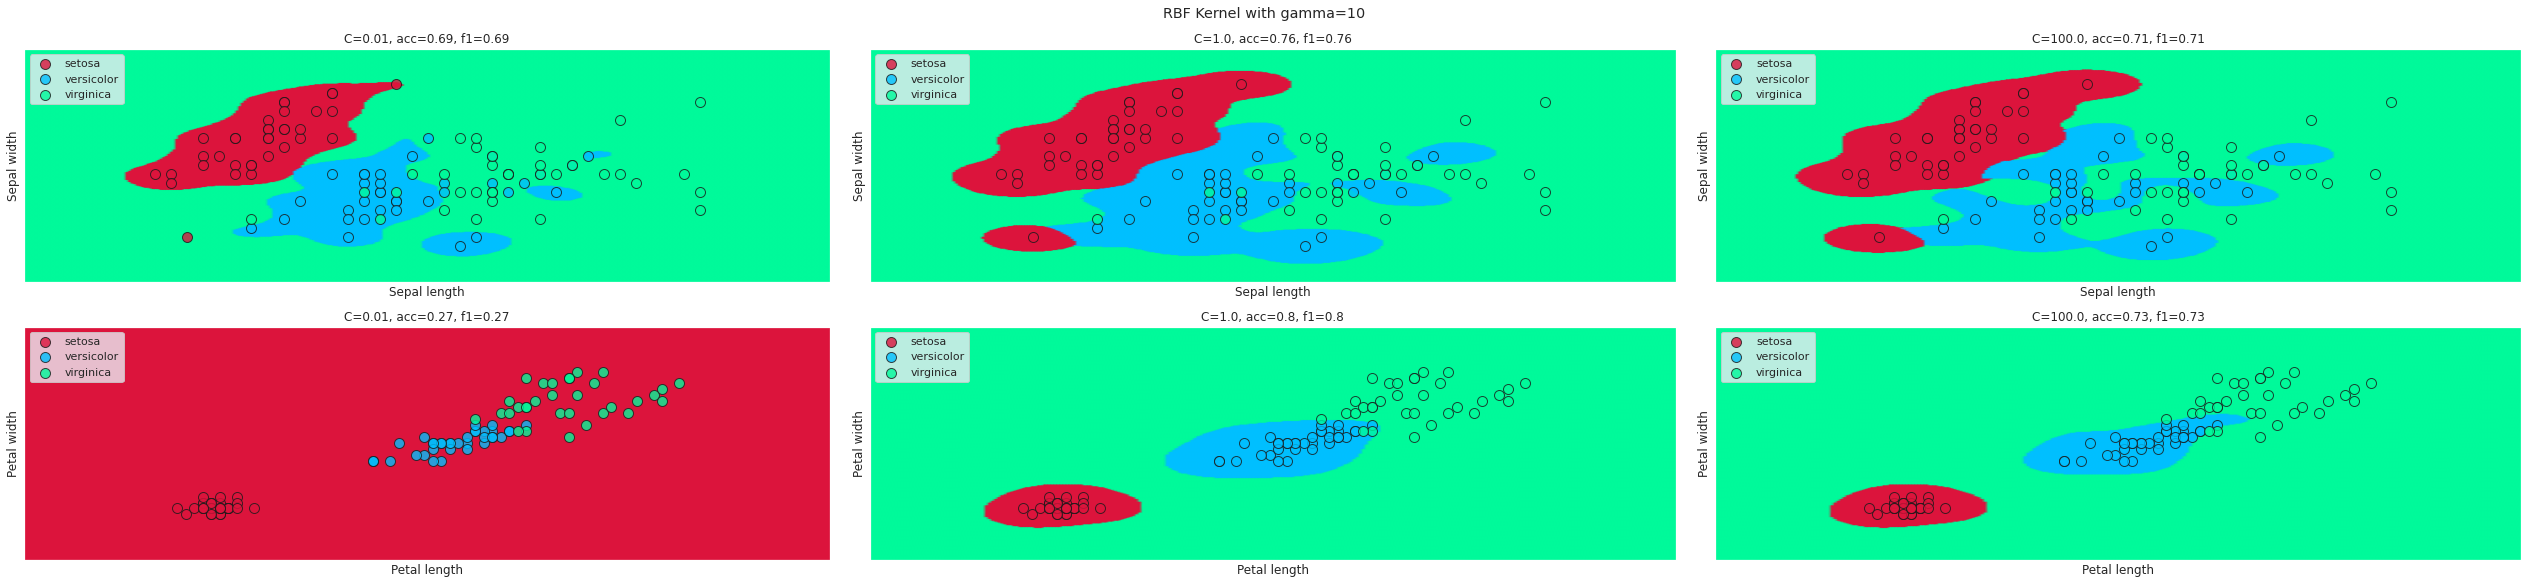

In [307]:
decision_boundary_rbf(gamma=0.1, resolution=0.02);print()
decision_boundary_rbf(gamma=1, resolution=0.02);print()
decision_boundary_rbf(gamma=10, resolution=0.02)

### Sigmoid Kernel

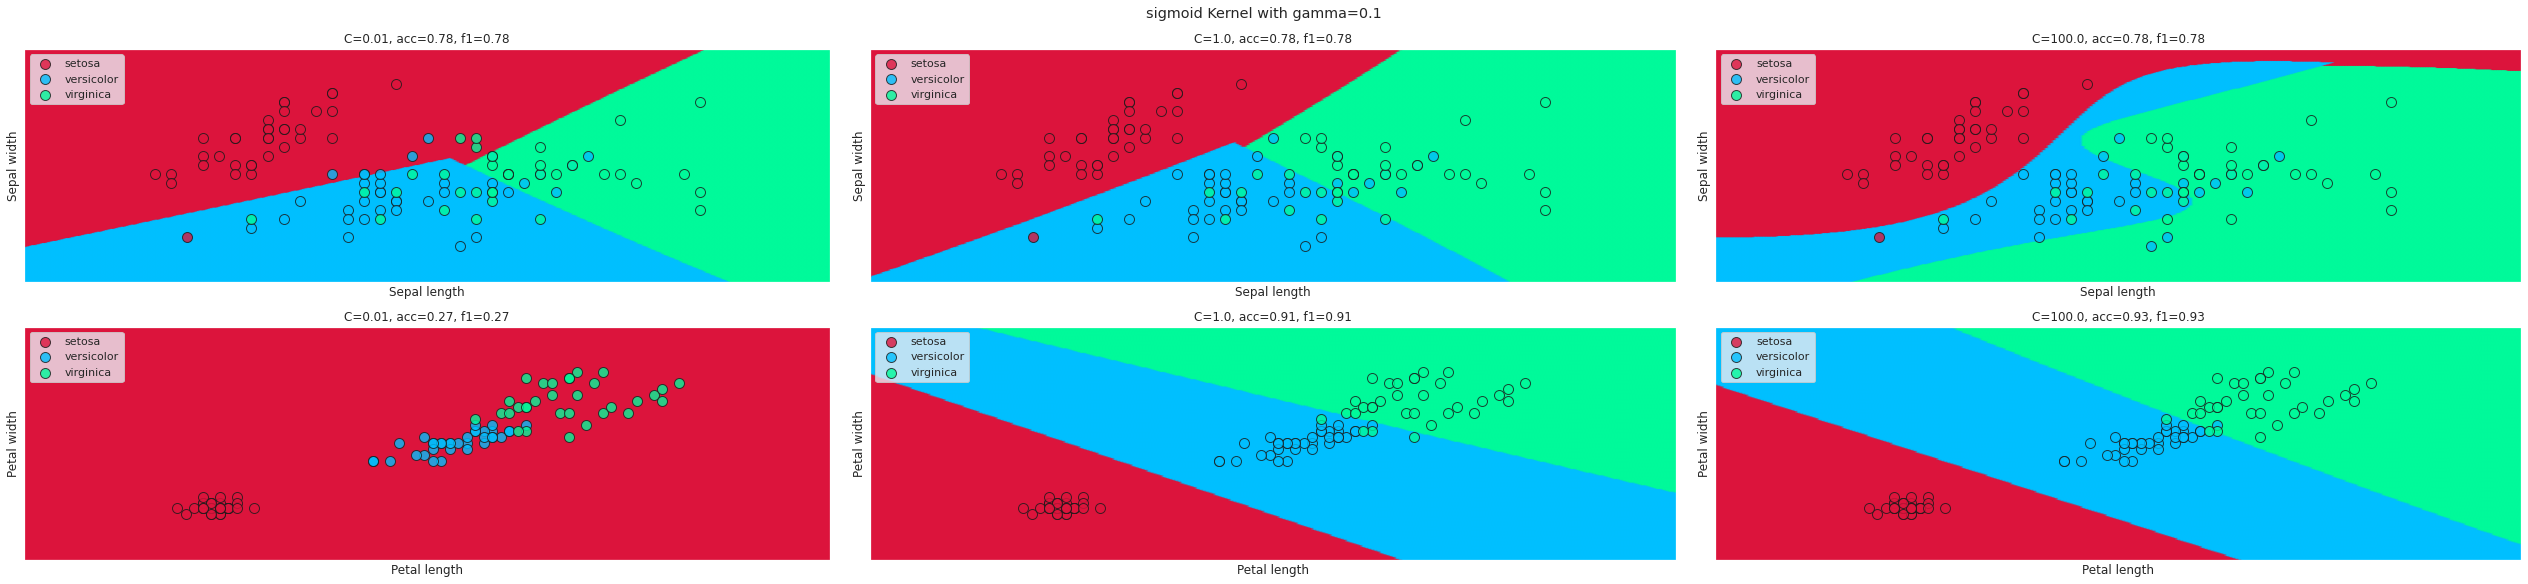

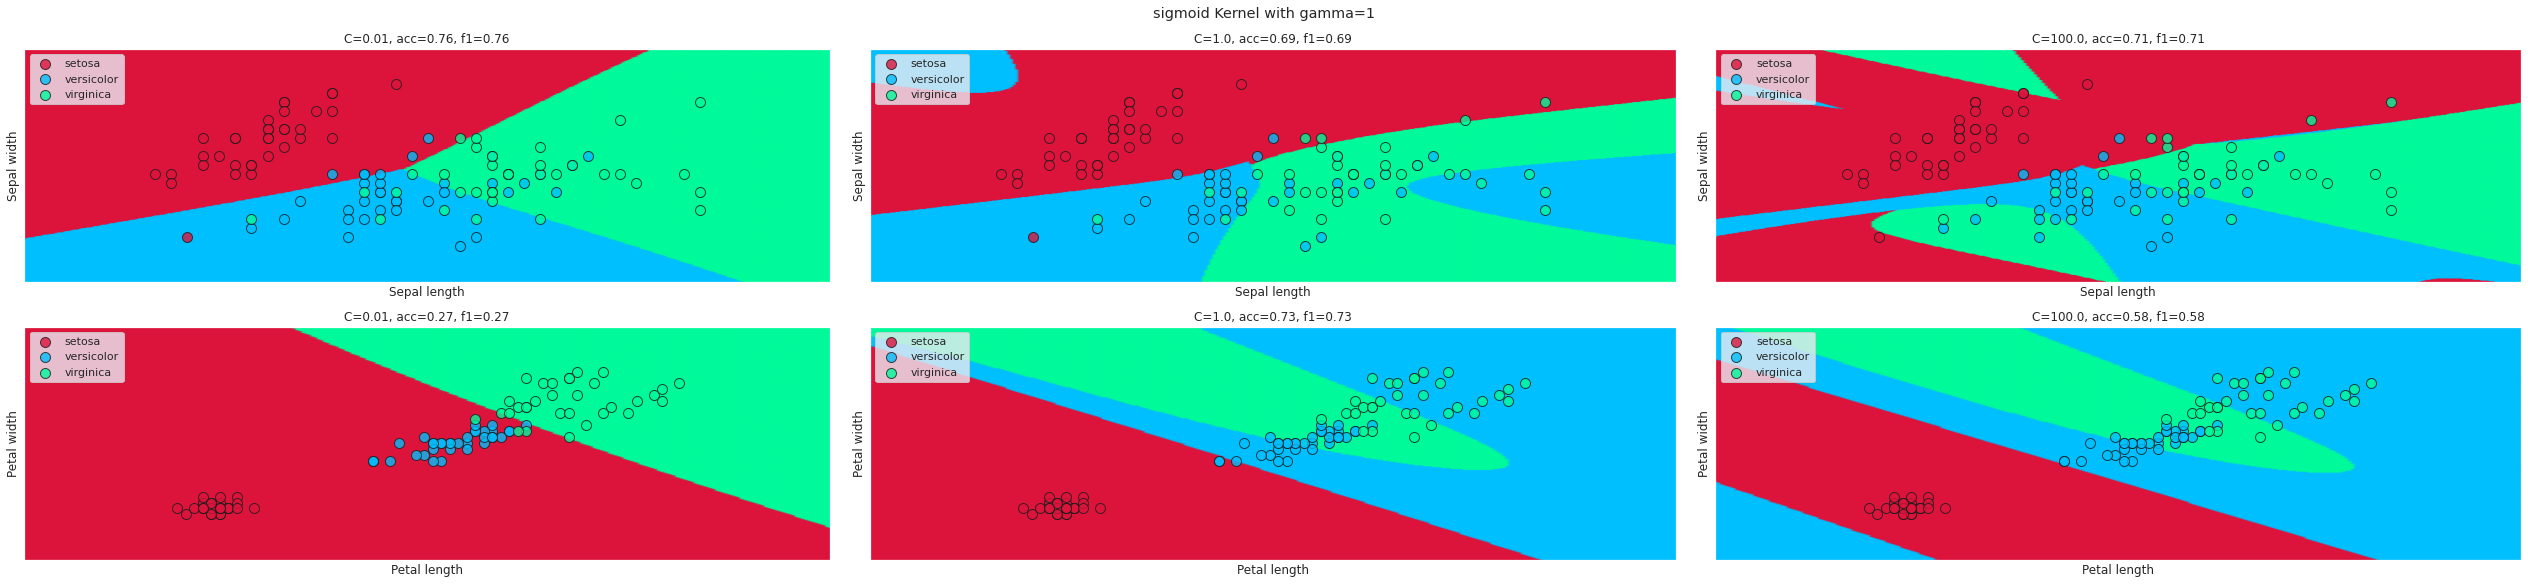

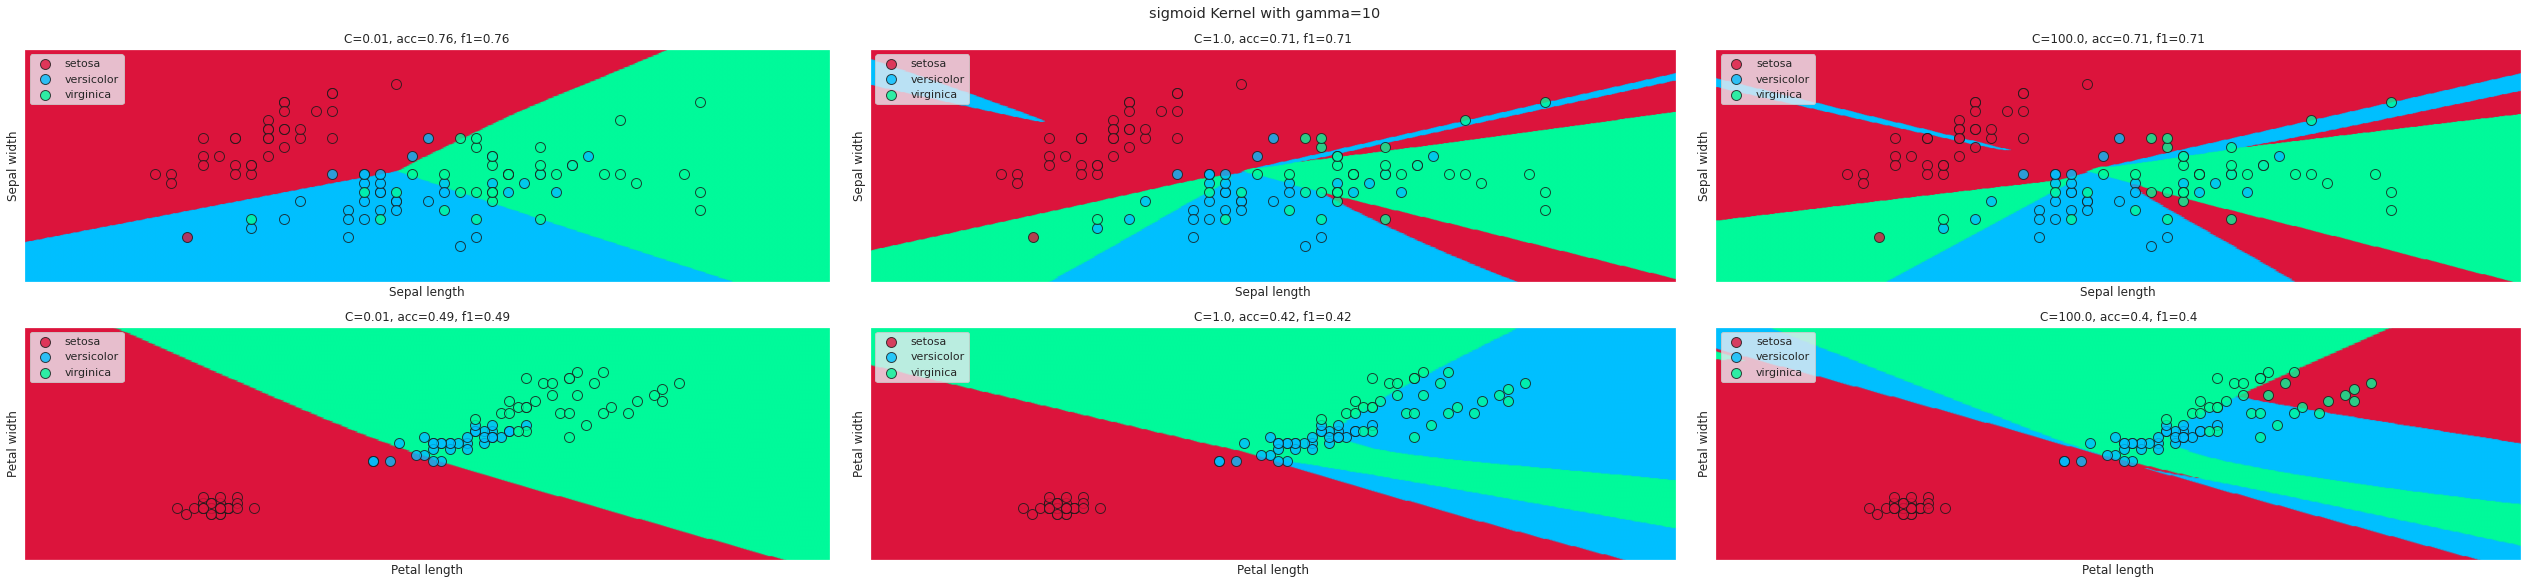

In [308]:
decision_boundary_sigmoid(gamma=0.1, resolution=0.02);print()
decision_boundary_sigmoid(gamma=1, resolution=0.02);print()
decision_boundary_sigmoid(gamma=10, resolution=0.02)

## soal 2


In [191]:
xx = np.array([[1,1],
              [2,2],
              [2,0],
              [0,0],
              [0,1],
              [1,0]])
yy = np.array([1,1,1,0,0,0])

model =  SVC(kernel="linear", C=10**10)
model.fit(xx, yy)

SVC(C=10000000000, kernel='linear')

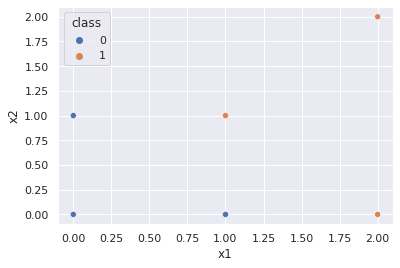

In [192]:
xx_data = pd.DataFrame({"x1":xx[:,0], "x2":xx[:,1], "class":yy})
sns.scatterplot(data=xx_data, x="x1", y="x2", hue="class")

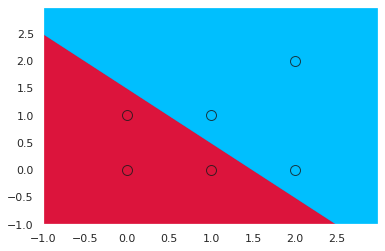

In [193]:
decision_boundary(xx, yy, model, res=0.01,)

In [194]:
model.coef_

array([[2., 2.]])

In [195]:
model.intercept_

array([-3.])